# TP KNN RENDU CODE/SCRIPT PYTHON #

### IMPORTATION DES LIBRAIRIES ###

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, roc_auc_score

# Choix et justification du dataset #
### Dataset choisi : WA_Fn-UseC_-Telco-Customer-Churn.csv ###
### Raison du choix : Il est idéal pour l’analyse de churn prediction car c'est un problème courant dans le domaine du marketing et de la fidélisation client.
### Justification dans le domaine : Le churn (départ d’un client) est un indicateur critique pour les entreprises de télécoms, car conserver un client existant coûte moins cher que d’en acquérir un nouveau. ###
### Analyser ce dataset permet donc d’identifier les facteurs qui influencent le départ des clients et de construire des modèles prédictifs pour anticiper le churn. ###
### Variable cible :
### Churn (Yes/No), qui indique si un client a quitté l’entreprise ou non. Cette variable sera prédite avec KNN pour comprendre et anticiper le comportement des clients. ###

## CHARGEMENT DES DONNÉES ##

In [37]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Convertir TotalCharges en numérique car ça a été stockés comme un texte dans le fichier CSV on peut le voir car la Data Type(Types de données) de monthlycharges est en "float64" donc a été stockés en numérique alors que la Data Type(Types de données) de totalcharges est "object" ### 

In [42]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [44]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Après avoir convertir TotalCharges en numérique on se rend compte qu'il y'a des valeurs manquantes parce que la Data Type(Types de données) de totalcharges qui était "object" a été numérisé donc les "" ont été changé en NaN ###

In [47]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/var/folders/t8/cvxqp8z14gndpvjgd_wg464w0000gn/T/ipykernel_77405/2840544469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


### On a décidé de remplir avec la médiane parceque TotalCharges est une variable numérique continue et pas une variable catégorielle si non on dévait remplir avec le mode ###

In [50]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Après imputation le dataset est enfin prêt pour le travail ###

In [197]:
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2281.916928
std      24.559481       30.090047   2265.270398
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


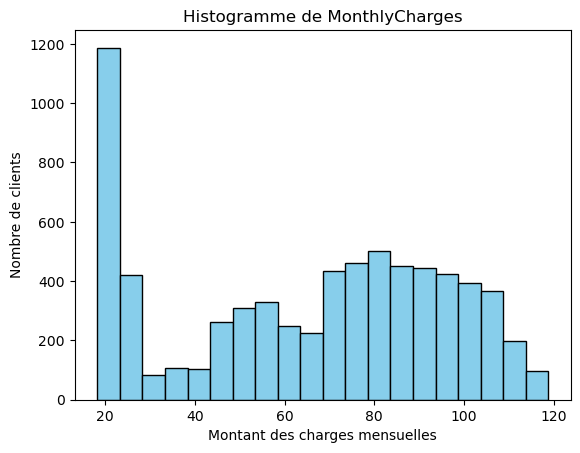

In [28]:
plt.hist(df['MonthlyCharges'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogramme de MonthlyCharges")
plt.xlabel("Montant des charges mensuelles")
plt.ylabel("Nombre de clients")
plt.show()

### mean > median → distribution asymétrique à droite (longue queue à droite). ###
### Interpretation : ce qui indique que la majorité des clients ont des factures mensuelles modérées à élevées, alors qu’une minorité bénéficie de tarifs plus bas. Cela peut influencer le churn, car les clients avec des charges élevées sont souvent plus enclins à résilier.

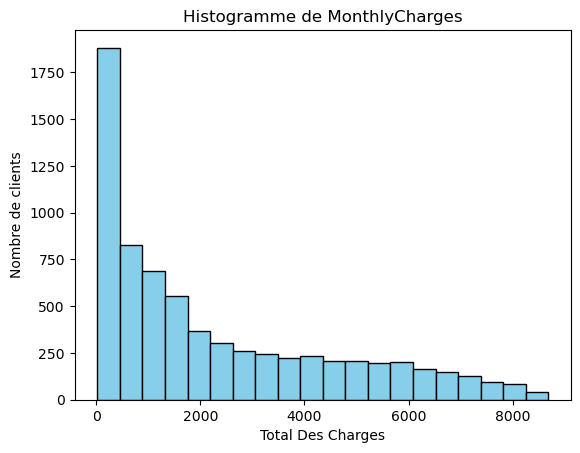

In [62]:
plt.hist(df['TotalCharges'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogramme de TotalCharges")
plt.xlabel("Total Des Charges")
plt.ylabel("Nombre de clients")
plt.show()

### mean < median → asymétrie à gauche ###
### Interpretation : de nombreux clients ont un montant cumulé faible, indiquant une faible ancienneté, tandis qu’une minorité possède des montants très élevés. Cette différence est cohérente avec le risque de churn, car les nouveaux clients sont généralement plus susceptibles de résilier.

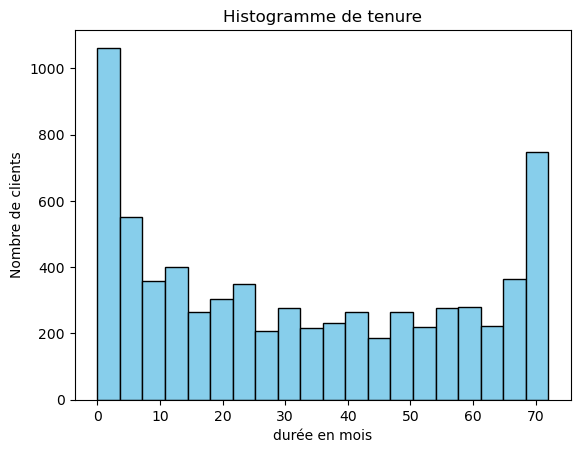

In [71]:
plt.hist(df['tenure'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogramme de tenure")
plt.xlabel("durée en mois")
plt.ylabel("Nombre de clients")
plt.show()

### mean > median → distribution asymétrique à droite ###
### la majorité des clients ont une ancienneté faible à moyenne, alors qu’une minorité possède une ancienneté très élevée. Cette structure est typique du churn, car les nouveaux clients sont souvent plus à risque de résiliation. ###

<Axes: xlabel='TotalCharges'>

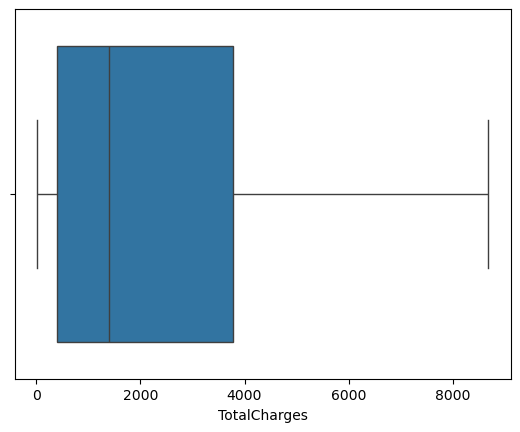

In [25]:
sns.boxplot(x=df['TotalCharges'])

### Pas de valeur extrêmes ###

<Axes: xlabel='MonthlyCharges'>

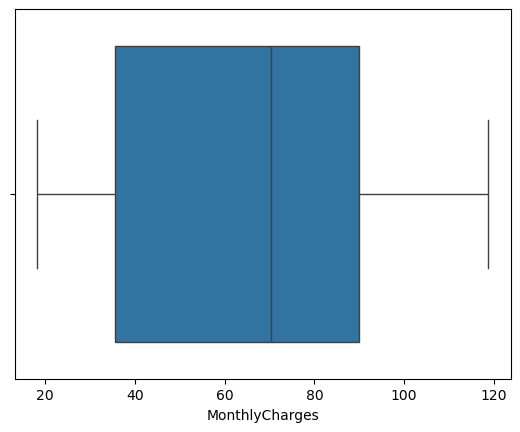

In [81]:
sns.boxplot(x=df['MonthlyCharges'])

### Pas de valeur extrêmes ###

<Axes: xlabel='tenure'>

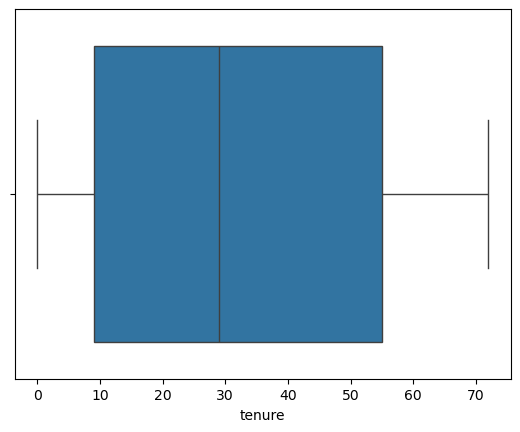

In [289]:
sns.boxplot(x=df['tenure'])

### Pas de valeur extrêmes ###

                  tenure  MonthlyCharges  TotalCharges  Churn_binary
tenure          1.000000        0.247900      0.825464     -0.352229
MonthlyCharges  0.247900        1.000000      0.650864      0.193356
TotalCharges    0.825464        0.650864      1.000000     -0.199037
Churn_binary   -0.352229        0.193356     -0.199037      1.000000


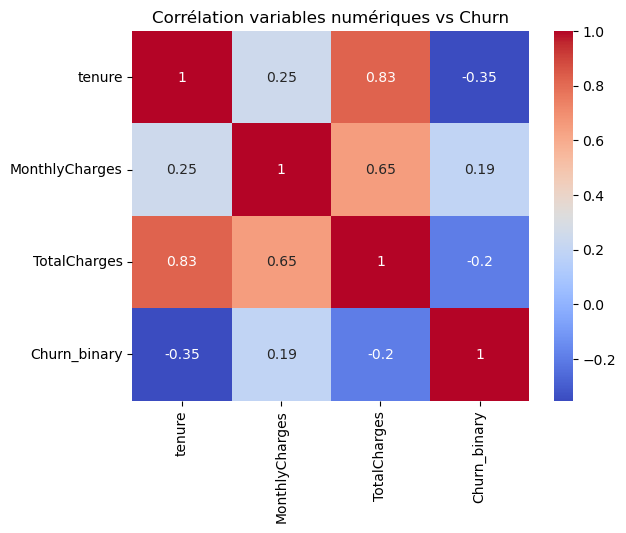

In [83]:
df['Churn_binary'] = df['Churn'].map({'No':0, 'Yes':1})
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_binary']].corr()
print(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Corrélation variables numériques vs Churn")
plt.show()

### Intepretation : 
### Tenure est la variable la plus importante parmi les trois, avec un effet clair sur le churn.
### MonthlyCharges et TotalCharges ont des effets plus faibles, mais utiles pour le modèle.

In [200]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


### La variable cible Churn est déséquilibrée, avec environ 26% de clients churners. Ce déséquilibre doit être pris en compte lors de l’entraînement du modèle KNN afin d’éviter une prédiction biaisée vers la classe majoritaire.
### Donc pour remedier à ça on va faire du over smapling

In [202]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [255]:
X = df[["MonthlyCharges", "tenure", "TotalCharges"]]
y = df["Churn"]

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [259]:
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

In [261]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [263]:
best_k = None
best_f1 = 0
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_res)
    y_pred = knn.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_k = k
print("Meilleur k :", best_k)
print("Meilleur F1-score :", best_f1)

Meilleur k : 18
Meilleur F1-score : 0.5831485587583148


### Ce k maximise l’intérêt business du modèle, notamment la capacité à identifier les clients à risque. ###

In [266]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train_res)
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:,1]

In [268]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train_res)
y_pred_lr = logreg.predict(X_test_scaled)
y_prob_lr = logreg.predict_proba(X_test_scaled)[:,1]

In [270]:
def get_metrics(y_true, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_prob)
    }

metrics_knn = get_metrics(y_test, y_pred_knn, y_prob_knn)
metrics_lr = get_metrics(y_test, y_pred_lr, y_prob_lr)
print("\n--- METRIQUES KNN ---")
print(metrics_knn)
print("\n--- METRIQUES LOGISTIC REGRESSION ---")
print(metrics_lr)


--- METRIQUES KNN ---
{'Accuracy': 0.7331440738112136, 'F1-score': 0.5831485587583148, 'Recall': 0.7032085561497327, 'ROC-AUC': 0.7873750290630086}

--- METRIQUES LOGISTIC REGRESSION ---
{'Accuracy': 0.7175301632363378, 'F1-score': 0.5783898305084746, 'Recall': 0.7299465240641712, 'ROC-AUC': 0.8096825027771319}


### Vu que le Accuracy de le knn est mieux que pour la regression logistique donc le knn est meilleur ###
### Les Raisons ###
•	KNN capture les relations non linéaires entre les variables.
•	Ici, tenure, MonthlyCharges, TotalCharges peuvent influencer le churn de façon non linéaire.
•	La régression logistique est un modèle linéaire : elle prédit la probabilité avec une combinaison linéaire des variables.
•	Si la séparation entre churn/no churn n’est pas linéaire, la régression logistique aura du mal → scores plus faibles.

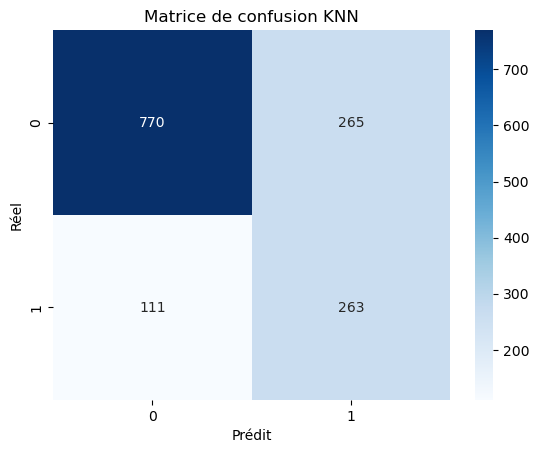

In [278]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion KNN")
plt.show()

770 clients correctement prédits comme restant
263 clients correctement prédits comme churn → succès, possibilité de retention.
111 clients churnés non détectés → problème, perte de revenu potentielle.
265 clients non churnés prédits churn → offre inutile, coût marketing.